<a href="https://colab.research.google.com/github/araujorobert/Time-series-course/blob/main/4_M%C3%A9todos_Autorregresivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts      # Herramientas estadisticas
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sb
sb.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('Index2018.csv')
# Transformamos la columna "date" de string a objeto tipo fecha
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
# Establecemos la fecha como indice del dataframe
data = data.set_index('date')
# Aplicamos la opcion business day para no tener problemas con los fines de semana
data = data.asfreq('b')
# cambiamos los valores nulos usando la siguiente observacion
data = data.fillna(method='ffill')
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [5]:
# Creamos la columna market value
data['market_value'] = data.ftse
# Dropeamos todas las demas columnas
data.drop(['spx','dax','ftse','nikkei'],1,inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [6]:
# Generamos los conjuntos de entrenamiento y validacion
size = int(len(data)*0.8)
df, df_test = data.iloc[:size],data.iloc[size:]

# Combrobamos las longitudes
print('La longitud del conjunto de entrenamiento es',len(df)/len(data))
print('La longitud del conjunto de prueba es',len(df_test)/len(data))

La longitud del conjunto de entrenamiento es 0.799904412936116
La longitud del conjunto de prueba es 0.20009558706388403


## ACF (Funcion de auto-correlacion)

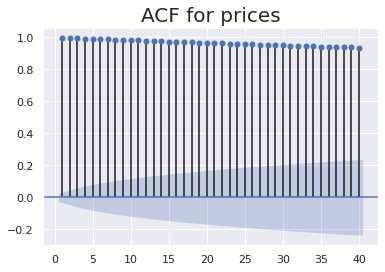

In [7]:
sgt.plot_acf(df['market_value'], zero=False, lags=40)
plt.title('ACF for prices', size=20)
plt.show()

# PACF

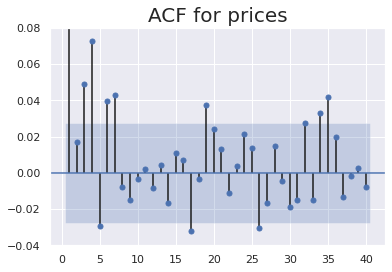

In [8]:
sgt.plot_pacf(df['market_value'], zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title('ACF for prices', size=20)
plt.ylim(-0.04,0.08)
plt.show()

## The $AR_1$ model

In [9]:
model_ar = ARMA(df.market_value, order=(1,0))

In [10]:
results_ar = model_ar.fit()

In [11]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.599
Method:                       css-mle   S.D. of innovations             59.258
Date:                Mon, 04 Apr 2022   AIC                          55251.198
Time:                        21:18:42   BIC                          55270.762
Sample:                    01-07-1994   HQIC                         55258.054
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5067.4707    486.503     10.416      0.000    4113.942    6021.000
ar.L1.market_value     0.9985      0.001   1298.545      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

## Highier lag AR model

In [12]:
model_ar2 = ARMA(df.market_value, order=(2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Mon, 04 Apr 2022   AIC                          55251.742
Time:                        21:18:45   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    495.670     10.268      0.000    4118.145    6061.137
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4629           +0.0000j           58.4629            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
model_ar3 = ARMA(df.market_value, order=(3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Mon, 04 Apr 2022   AIC                          55241.742
Time:                        21:18:49   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    520.356      9.781      0.000    4069.761    6109.521
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [14]:
model_ar4 = ARMA(df.market_value, order=(4,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Mon, 04 Apr 2022   AIC                          55217.130
Time:                        21:18:51   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    560.009      9.088      0.000    3992.043    6187.239
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

## LLR Test
Este es un contraste de hipotesis que nos dice si dos modelos son significativamente similares. En otras palabras nos ayuda a decidir si el aumentar la complejidad al modelo nos aporta una mejora en la precisión de la predicción.

$$
H_0: Los\ modelos\ son\ similares\\
H_1: Los\ modelos\ no\ son\ similares
$$

In [15]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [19]:
p_valor=LLR_test(results_ar2, results_ar3)
if p_valor>0.05:
  print('El p-valor es > 0.05, por lo tanto aceptamos la hipotesis nula')
  print('Los modelos son similares, por lo tanto nos quedamos con el mas facil')
if p_valor<0.05:
  print('El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula')
  print('Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo')  

El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula
Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo


In [20]:
p_valor=LLR_test(results_ar3, results_ar4)
if p_valor>0.05:
  print('El p-valor es > 0.05, por lo tanto aceptamos la hipotesis nula')
  print('Los modelos son similares, por lo tanto nos quedamos con el mas facil')
if p_valor<0.05:
  print('El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula')
  print('Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo') 

El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula
Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo


In [22]:
model_ar5 = ARMA(df.market_value, order=(5,0))
results_ar5 = model_ar5.fit()
print(results_ar5.summary())

p_valor=LLR_test(results_ar4, results_ar5)
if p_valor>0.05:
  print('El p-valor es > 0.05, por lo tanto aceptamos la hipotesis nula')
  print('Los modelos son similares, por lo tanto nos quedamos con el mas facil')
if p_valor<0.05:
  print('El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula')
  print('Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo') 

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.524
Method:                       css-mle   S.D. of innovations             58.997
Date:                Mon, 04 Apr 2022   AIC                          55215.049
Time:                        21:44:06   BIC                          55260.698
Sample:                    01-07-1994   HQIC                         55231.045
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5369.4922    703.058      7.637      0.000    3991.525    6747.460
ar.L1.market_value     0.9792      0.014     69.511      0.000       0.952       1.007
ar.L2.market_value  

In [26]:
model_ar6 = ARMA(df.market_value, order=(6,0))
results_ar6 = model_ar6.fit()
print(results_ar6.summary())

p_valor=LLR_test(results_ar5, results_ar6)
if p_valor>0.05:
  print('El p-valor es > 0.05, por lo tanto aceptamos la hipotesis nula')
  print('Los modelos son similares, por lo tanto nos quedamos con el mas facil')
if p_valor<0.05:
  print('El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula')
  print('Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo') 

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Mon, 04 Apr 2022   AIC                          55208.947
Time:                        21:46:40   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    565.227      9.005      0.000    3981.816    6197.466
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [27]:
model_ar7 = ARMA(df.market_value, order=(7,0))
results_ar7 = model_ar7.fit()
print(results_ar7.summary())

p_valor=LLR_test(results_ar6, results_ar7)
if p_valor>0.05:
  print('El p-valor es > 0.05, por lo tanto aceptamos la hipotesis nula')
  print('Los modelos son similares, por lo tanto nos quedamos con el mas facil')
if p_valor<0.05:
  print('El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula')
  print('Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo') 

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Mon, 04 Apr 2022   AIC                          55201.799
Time:                        21:46:57   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    589.532      8.633      0.000    3934.180    6245.103
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [28]:
model_ar8 = ARMA(df.market_value, order=(8,0))
results_ar8 = model_ar8.fit()
print(results_ar8.summary())

p_valor=LLR_test(results_ar7, results_ar8)
if p_valor>0.05:
  print('El p-valor es > 0.05, por lo tanto aceptamos la hipotesis nula')
  print('Los modelos son similares, por lo tanto nos quedamos con el mas facil')
if p_valor<0.05:
  print('El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula')
  print('Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo') 

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Mon, 04 Apr 2022   AIC                          55203.478
Time:                        21:47:11   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    585.014      8.700      0.000    3943.035    6236.248
ar.L1.market_value     0.9790      0.014     69.477      0.000       0.951       1.007
ar.L2.market_value  

In [30]:
# Por ultimo contrastamos los modelos 1 y 7 
print("LLR test: " + str(LLR_test(results_ar, results_ar7, DF = 6)))

p_valor=LLR_test(results_ar, results_ar7)
if p_valor>0.05:
  print('El p-valor es > 0.05, por lo tanto aceptamos la hipotesis nula')
  print('Los modelos son similares, por lo tanto nos quedamos con el mas facil')
if p_valor<0.05:
  print('El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula')
  print('Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo') 

LLR test: 0.0
El p-valor es < 0.05, por lo tanto rechazamos la hipotesis nula
Los modelos NO son similares, por lo tanto nos quedamos con el mas complejo


- Notece que hemos despreciado el modelo 8 porque su ultimo p-valor fue no significativo. 
- Como prueba final, contrastamos el modelo 1 con el 7 para ver si vale la pena la complejidad del 7 sobre el 1.
- A pesar de ser mejor el 7 que los anteriores, note que tiene coeficientes no significativos (aquellos en los que el p-valor es mayor a 0.05) esto se debe a que los modelo autoregresivos funcionan mejor con series estacionarias y ésta no lo es.

## Residual Analysis

In [32]:
# Calculamos los residuos del modelo 7
df['res_price'] = results_ar7.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# Los residuos deben ser semejantes a ruido blanco, es decir, no deben tener correlación, o en otras palabras, deben ser estaiconarios.
# Para esto aplicamos el test de DF
sts.adfuller(df.res_price)

(-76.07470750864573,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 54842.414964516414)

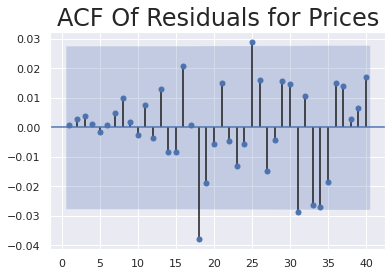

In [34]:
# El p-valor es cero, por lo tanto rechazamos la hipotesis nula que nos dice que los resoduos no son estacionarios.
# Para corroborar esto hacemos la grafica de correlacion
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

Vemos que caen dentro del area sombreada, lo que nos dice que son muy cercanos a cero y por lo tanto es ruido blanco

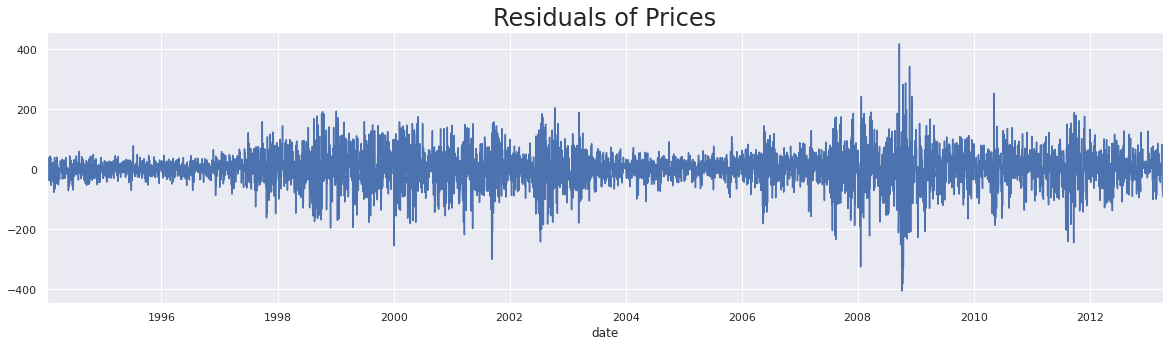

In [35]:
# Por ultimo ploteamos los residuos
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()

In [36]:
# La grafica anterior termina de confirmar nuestras sospechas.